#Klasifikasi (dengan Hyperparameter Tuning)

Dataset: https://www.kaggle.com/datasets/ankitverma2010/ecommerce-customer-churn-analysis-and-prediction

Setelah ditentukan fitur-fitur yang akan digunakan sesuai dengan hasil visualisasi di Colab0: https://colab.research.google.com/drive/12xwqqv7F0ZF7hytN2U5kmlGr0_lHeOhG?ouid=106950143032811372632&usp=drive_link

Maka, dibuatlah klasifikasi dengan menggunakan algoritma machine learning yang bertujuan untuk prediksi customer churn pada e-commerce XYZ.

Parameter algoritma klasifikasi yang digunakan yaitu hyperparameter tuning (berdasarkan rangkuman parameter https://docs.google.com/spreadsheets/d/1SwdHlndnVU8mGfc1X6n9RxK3bcWqKYSO6sVfMsIndkU/edit?usp=sharing ) yaitu:
1. Skema 10 Algoritma Random Forest
2. Skema 10 Algoritma SVM
3. Skema 10 Algoritma Decision Tree


Fitur yang dipakai adalah 5 fitur yang paling berkolerasi dengan label churn yaitu:

1. Complain
2. PreferedOrderCat
3. MaritalStatus
4. SatisfactionScore
5. NumberOfDeviceRegistered

#1. Import Library

Pada tahap ini, kami melakukan impor library atau modul yang dibutuhkan dalam proses pembangunan model klasifikasi. Library ini mencakup NumPy dan Pandas untuk manipulasi data, Scikit-Learn untuk pembangunan model, dan matplotlib atau seaborn untuk visualisasi data.

In [ ]:
# Impor pustaka yang diperlukan untuk operasi numerik
import numpy as np  # Import numpy untuk operasi numerik seperti manipulasi array


# Impor pustaka yang diperlukan untuk pemrosesan data dan pembangunan model
# Import pandas untuk manipulasi dan analisis data
import pandas as pd

# Import train_test_split dari scikit-learn untuk memisahkan data
from sklearn.model_selection import train_test_split

# Import StandardScaler dari scikit-learn untuk standarisasi data, encoding
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

# Import SMOTEKTomek dari imbalanced-learn untuk menyeimbangkan data
from imblearn.combine import SMOTETomek

# Import RandomForestClassifier dari scikit-learn untuk model Random Forest
from sklearn.ensemble import RandomForestClassifier

# Import SVC dari scikit-learn untuk model Support Vector Machine (SVM)
from sklearn.svm import SVC

# Import DecisionTreeClassifier dari scikit-learn untuk model Decision Tree
from sklearn.tree import DecisionTreeClassifier

# Import GridSearchCV dari scikit-learn untuk membantu hyperparameter tuning
from sklearn.model_selection import GridSearchCV

# Import metrik evaluasi dari scikit-learn untuk mengukur performa model
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score, roc_auc_score, RocCurveDisplay, confusion_matrix


# Impor pustaka untuk visualisasi data
# Import matplotlib.pyplot untuk membuat plot
import matplotlib.pyplot as plt

# Import seaborn untuk plot visualisasi data yang lebih menarik
import seaborn as sns

# Import plotly.express untuk membuat histogram
import plotly.express as px

# Import plot_confusion_matrix dari mlxtend untuk membuat plot confusion matrix
from mlxtend.plotting import plot_confusion_matrix


# Import pustaka untuk deployment
import pickle # Import pickle untuk menyimpan model dalam format file pickle

#2. Menampilkan Dataset
Pada tahap ini, kami menampilkan dataset yang akan digunakan untuk pembangunan model klasifikasi. Data bersumber dari Kaggle yang diunggah oleh Ankit Verma pada tahun 2020 dengan link download [di sini.](https://www.kaggle.com/datasets/ankitverma2010/ecommerce-customer-churn-analysis-and-prediction/download?datasetVersionNumber=1)


In [ ]:
# URL raw dari file excel di GitHub
url = "https://github.com/ranidsr/projekmsib/raw/main/E%20Commerce%20Dataset.xlsx"

# Membaca data sheet E Comm dari URL raw
df = pd.read_excel(url, sheet_name='E Comm')

# Menampilkan sampel dataset
df

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,55626,0,10.0,Computer,1,30.0,Credit Card,Male,3.0,2,Laptop & Accessory,1,Married,6,0,18.0,1.0,2.0,4.0,150.71
5626,55627,0,13.0,Mobile Phone,1,13.0,Credit Card,Male,3.0,5,Fashion,5,Married,6,0,16.0,1.0,2.0,NaN,224.91
5627,55628,0,1.0,Mobile Phone,1,11.0,Debit Card,Male,3.0,2,Laptop & Accessory,4,Married,3,1,21.0,1.0,2.0,4.0,186.42
5628,55629,0,23.0,Computer,3,9.0,Credit Card,Male,4.0,5,Laptop & Accessory,4,Married,4,0,15.0,2.0,2.0,9.0,178.90


#Seleksi Fitur

Pada tahap ini, kami melakukan seleksi fitur untuk memilih fitur-fitur yang paling berpengaruh dalam memprediksi customer churn. Pemilihan fitur ini menggunakan metode korelasi untuk menilai korelasi antara setiap fitur dengan kolom target "Churn" dan memilih fitur-fitur yang memiliki korelasi tinggi.

Sebelumnya pada [Colab0](https://colab.research.google.com/drive/12xwqqv7F0ZF7hytN2U5kmlGr0_lHeOhG?usp=drive_link), kami memilih 5 fitur yang paling berkorelasi positif terhadap kolom target "Churn" adalah:
1. Complain
2. PreferedOrderCat
3. MaritalStatus
4. SatisfactionScore
5. NumberOfDeviceRegistered

Berikut kesimpulan dari metode korelasi menggunakan Pearson yang menunjukkan hasil tersebut.
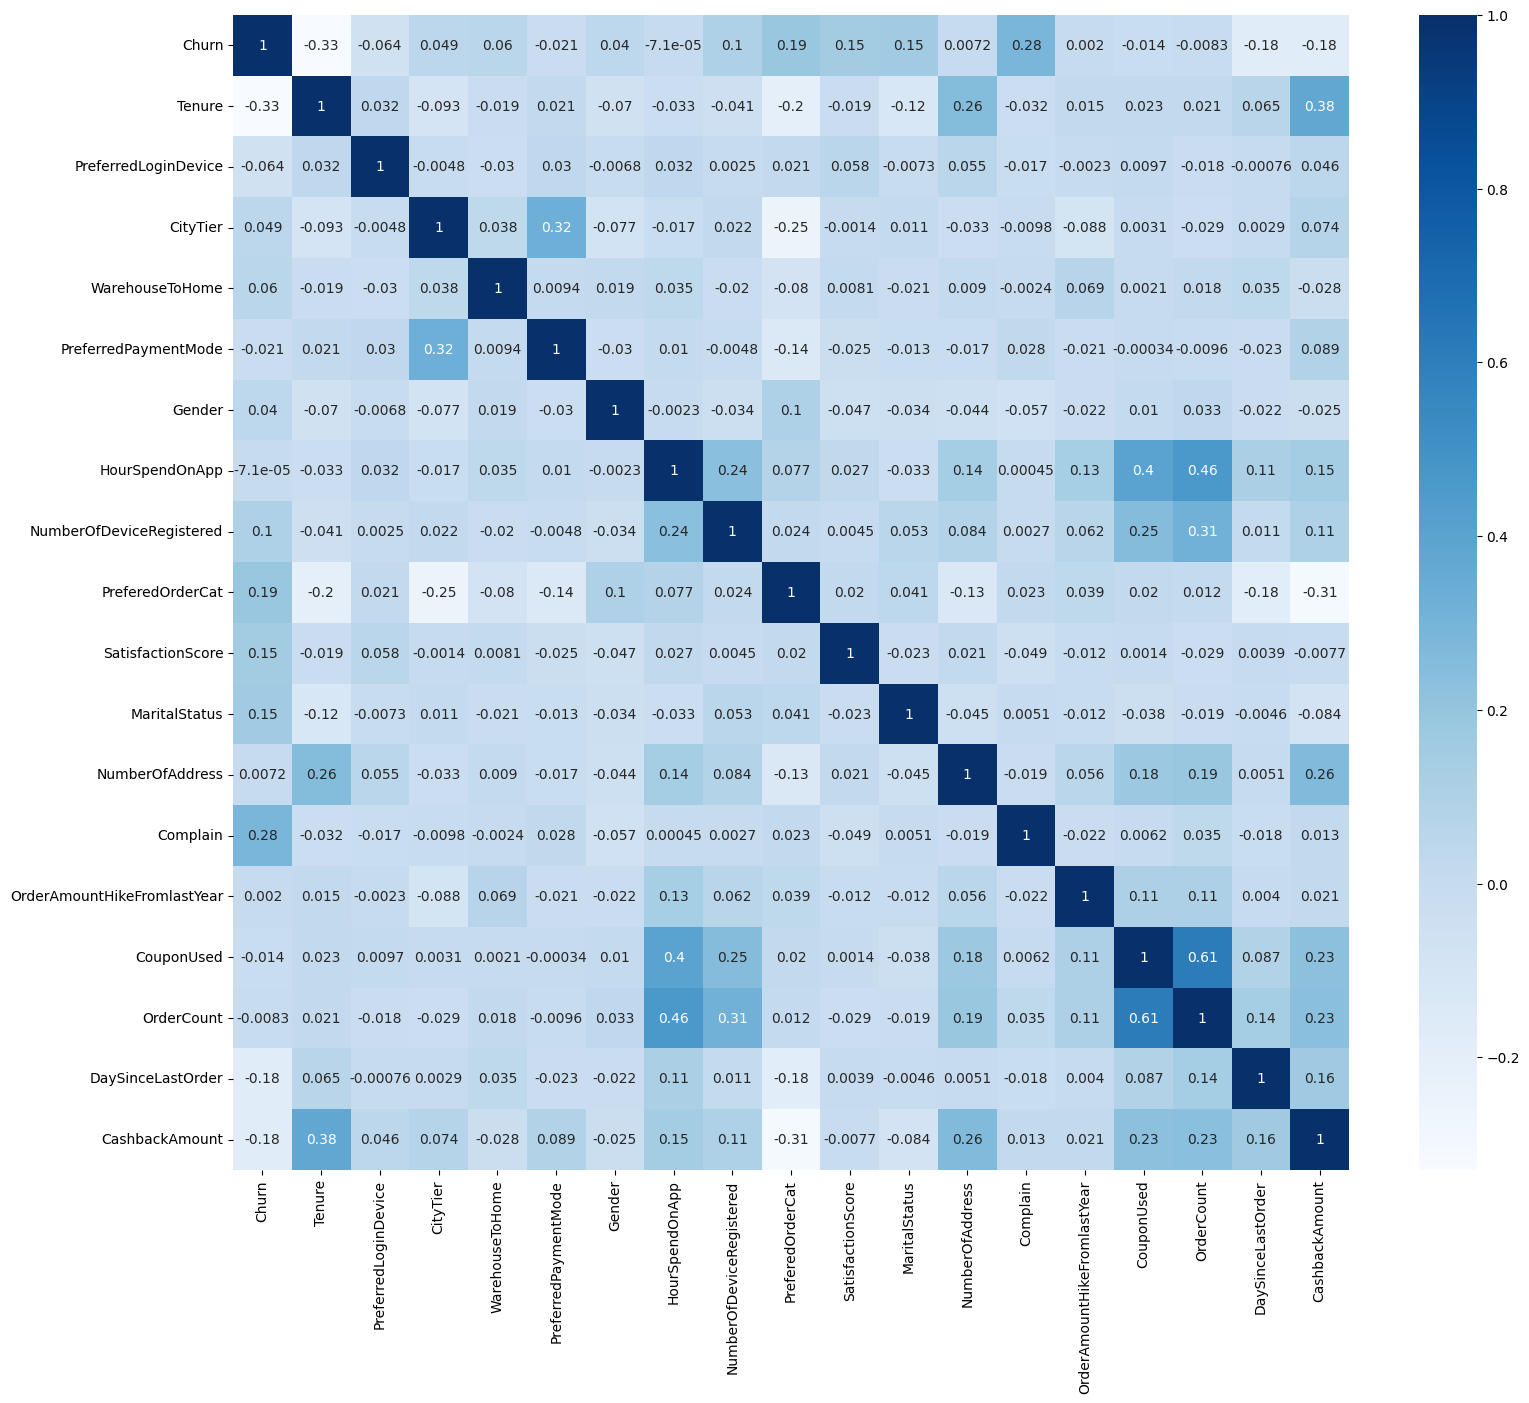

In [ ]:
# Menampilkan DataFrame dengan kolom-kolom yang terpilih
df=df[['Churn', 'Complain', 'PreferedOrderCat', 'MaritalStatus', 'SatisfactionScore', 'NumberOfDeviceRegistered']]

# Cetak DataFrame yang telah difilter
df

,Churn,Complain,PreferedOrderCat,MaritalStatus,SatisfactionScore,NumberOfDeviceRegistered
0,1,1,Laptop & Accessory,Single,2,3
1,1,1,Mobile,Single,3,4
2,1,1,Mobile,Single,3,4
3,1,0,Laptop & Accessory,Single,5,4
4,1,0,Mobile,Single,5,3
...,...,...,...,...,...,...
5625,0,0,Laptop & Accessory,Married,1,2
5626,0,0,Fashion,Married,5,5
5627,0,1,Laptop & Accessory,Married,4,2
5628,0,0,Laptop & Accessory,Married,4,5


In [ ]:
# Menampilkan informasi mengenai dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Churn                     5630 non-null   int64 
 1   Complain                  5630 non-null   int64 
 2   PreferedOrderCat          5630 non-null   object
 3   MaritalStatus             5630 non-null   object
 4   SatisfactionScore         5630 non-null   int64 
 5   NumberOfDeviceRegistered  5630 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 264.0+ KB


#3. Exploratory Data Analysis

Dalam tahap ini, kami melakukan Exploratory Data Analysis (EDA) pada dataset untuk memahami lebih dalam tentang dataset yang dimiliki.

In [ ]:
# Melihat persebaran nilai pada kolom tipe data objek (PreferedOrderCat & MaritalStatus)
for col in df.columns:
    if df[col].dtype == object:
        print(str(col) + ' : ' + str(df[col].unique()))
        print(df[col].value_counts())
        print("________________________________________________________________________________")

PreferedOrderCat : ['Laptop & Accessory' 'Mobile' 'Mobile Phone' 'Others' 'Fashion' 'Grocery']
Laptop & Accessory    2050
Mobile Phone          1271
Fashion                826
Mobile                 809
Grocery                410
Others                 264
Name: PreferedOrderCat, dtype: int64
________________________________________________________________________________
MaritalStatus : ['Single' 'Divorced' 'Married']
Married     2986
Single      1796
Divorced     848
Name: MaritalStatus, dtype: int64
________________________________________________________________________________


In [ ]:
# Melihat persebaran nilai pada kolom tipe data selain objek (Churn, Complain, SatisfactionScore, NumberOfDeviceRegistered)
for col in df.columns:
    if df[col].dtype == float or df[col].dtype == int:
        print(str(col) + ' : ' + str(df[col].unique()))
        print(df[col].value_counts())
        print("________________________________________________________________________________")

Churn : [1 0]
0    3700
1     748
Name: Churn, dtype: int64
________________________________________________________________________________
Complain : [1 0]
0    3188
1    1260
Name: Complain, dtype: int64
________________________________________________________________________________
PreferedOrderCat : [2 3 4 1]
3    1926
2    1894
1     380
4     248
Name: PreferedOrderCat, dtype: int64
________________________________________________________________________________
MaritalStatus : [2 0 1]
1    2313
2    1454
0     681
Name: MaritalStatus, dtype: int64
________________________________________________________________________________
SatisfactionScore : [2 3 5 4 1]
3    1336
1     918
4     871
5     855
2     468
Name: SatisfactionScore, dtype: int64
________________________________________________________________________________
NumberOfDeviceRegistered : [3 4 5 2]
4    2010
3    1453
5     736
2     249
Name: NumberOfDeviceRegistered, dtype: int64
_________________________________

##Penggabungan Data Yang Sama

Pada bagian ini, kami melihat terdapat nilai yang sama pada sampel data di kolom PreferedOrderCat yaitu nilai 'Mobile' dan 'Mobile Phone' sehingga kami memutuskan untuk menjumlahkan data tersebut dan memasukkannya pada nilai 'Mobile Phone'.

In [ ]:
# Penggabungan data 'Mobile' dan 'Mobile Phone'
df.loc[df['PreferedOrderCat'] == 'Mobile', 'PreferedOrderCat' ] = 'Mobile Phone'

# Menghitung jumlah nilai-nilai pada kolom PreferedOrderCat
df['PreferedOrderCat'].value_counts()

Mobile Phone          2080
Laptop & Accessory    2050
Fashion                826
Grocery                410
Others                 264
Name: PreferedOrderCat, dtype: int64

##Label Encoding
Pada tahap ini, kami mengubah nilai-nilai dalam kolom yang awalnya berupa teks menjadi angka-angka. Hal ini diperlukan karena kebanyakan model machine learning memerlukan input berupa angka, bukan teks.

Contoh, pada label kolom 'MaritalStatus', nilai 'Divorced' akan diwakili oleh 0, 'Married' diwakili oleh 1, dan 'Single' diwakilkan oleh 2.

In [ ]:
# Membuat objek LabelEncoder
le = LabelEncoder()

# Menggunakan LabelEncoder untuk mengubah kolom tipe data objek menjadi numerik
for i in df.columns:
  if df[i].dtype == 'object':
    df[i] = le.fit_transform(df[i])

# Cetak DataFrame setelah encoding
df

<ipython-input-10-23f7497bf918>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i] = le.fit_transform(df[i])
<ipython-input-10-23f7497bf918>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i] = le.fit_transform(df[i])


,Churn,Complain,PreferedOrderCat,MaritalStatus,SatisfactionScore,NumberOfDeviceRegistered
0,1,1,2,2,2,3
1,1,1,3,2,3,4
2,1,1,3,2,3,4
3,1,0,2,2,5,4
4,1,0,3,2,5,3
...,...,...,...,...,...,...
5625,0,0,2,1,1,2
5626,0,0,0,1,5,5
5627,0,1,2,1,4,2
5628,0,0,2,1,4,5


## Menampilkan Statistik Deskriptif

Kami menampilkan statistik deskritif dari fitur yang telah terpilih. Statistik deskriptif ini memberikan gambaran mengenai distribusi nilai-nilai dalam fitur tersebut.


Statistik deskriptif umumnya mencakup informasi seperti rata-rata (mean), deviasi standar (std), nilai minimum (min), nilai maksimum (max), quartil pertama (25% atau Q1), quartil kedua (50% atau Q2), dan quartil ketiga (75% atau Q3).


In [ ]:
# Menggunakan metode .describe() untuk statstik deskriptif
statdesc = df.describe()

# Cetak statistik deskriptif
statdesc

,Churn,Complain,PreferedOrderCat,MaritalStatus,SatisfactionScore,NumberOfDeviceRegistered
count,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000
mean,0.168384,0.284902,2.096980,1.168384,3.066785,3.688988
std,0.374240,0.451408,1.098866,0.664344,1.380194,1.023999
min,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,0.000000,0.000000,2.000000,1.000000,2.000000,3.000000
50%,0.000000,0.000000,2.000000,1.000000,3.000000,4.000000
75%,0.000000,1.000000,3.000000,2.000000,4.000000,4.000000
max,1.000000,1.000000,4.000000,2.000000,5.000000,6.000000


##Mengatasi Outlier

Outlier atau data pencilan merupakan data-data yang bernilai terlampu terlalu besar maupun terlalu kecil dibandingkan kelompok data lainnya dalam satu kolom.

Outlier dapat menunjukkan keberagaman dalam pengukuran, error, maupun kebaruan. Namun, agar model yang akan digunakan tidak dipengaruhi oleh outlier, maka kami memutuskan untuk menghapus data pencilan.

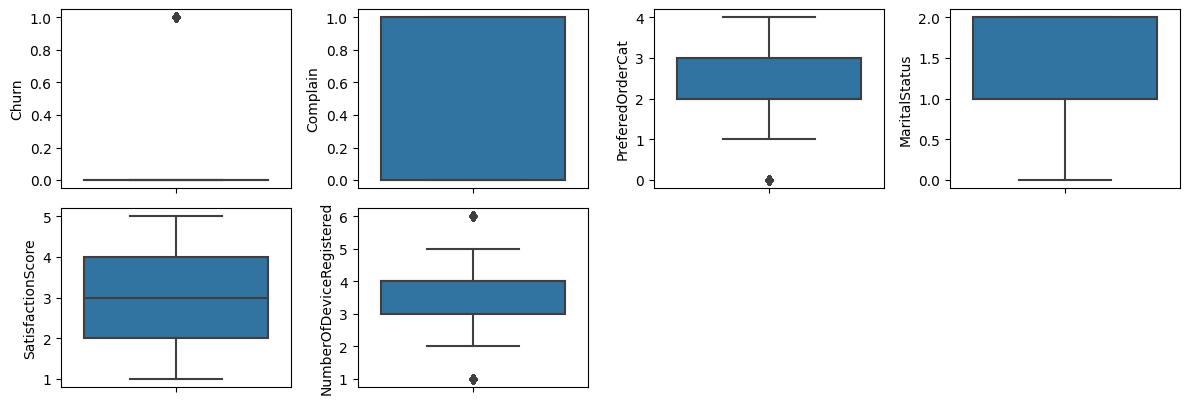

In [ ]:
# Visualisasi data menggunakan BoxPlot untuk melihat outlier

fig = plt.figure(figsize=(12,18))
for i in range(len(df.columns)):
    fig.add_subplot(9,4,i+1)
    sns.boxplot(y=df.iloc[:,i])

plt.tight_layout()
plt.show()

In [ ]:
# Membuat fungsi untuk menentukan data tersebut adalah outlier menggunakan perhitungan IQR (Inter-Quartile Range)
def handle_outliers(df , column_name):
  Q1 = df[column_name].quantile(0.25)
  Q3 = df[column_name].quantile(0.75)
  IQR = Q3 - Q1

# Menetapkan batas bawah dan atas
  Upper = Q3 + IQR * 1.5
  lower = Q1 - IQR * 1.5

# Menghapus baris data yang memiliki outlier dengan metode trimming outliers
  new_df = df[ (df[column_name] > lower) & (df[column_name] < Upper) ]

  return new_df

df.columns

Index(['Churn', 'Complain', 'PreferedOrderCat', 'MaritalStatus',
       'SatisfactionScore', 'NumberOfDeviceRegistered'],
      dtype='object')

In [ ]:
# Mengaplikasikan fungsi terhadap data yang memiliki outlier yaitu kolom data PreferedOrderCat dan NumberOfDeviceRegistered
cols_outliers = ['PreferedOrderCat', 'NumberOfDeviceRegistered']
for col in cols_outliers:
    df = handle_outliers(df , col)

# Cetak 5 data teratas
df.head()

,Churn,Complain,PreferedOrderCat,MaritalStatus,SatisfactionScore,NumberOfDeviceRegistered
0,1,1,2,2,2,3
1,1,1,3,2,3,4
2,1,1,3,2,3,4
3,1,0,2,2,5,4
4,1,0,3,2,5,3


In [ ]:
# Melihat rangkuman data setelah trimming outlier
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4448 entries, 0 to 5629
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Churn                     4448 non-null   int64
 1   Complain                  4448 non-null   int64
 2   PreferedOrderCat          4448 non-null   int64
 3   MaritalStatus             4448 non-null   int64
 4   SatisfactionScore         4448 non-null   int64
 5   NumberOfDeviceRegistered  4448 non-null   int64
dtypes: int64(6)
memory usage: 243.2 KB


In [ ]:
# Me-reset penomoran index sesuai jumlah baris data
df.reset_index()
df = pd.concat([df], ignore_index=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4448 entries, 0 to 4447
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Churn                     4448 non-null   int64
 1   Complain                  4448 non-null   int64
 2   PreferedOrderCat          4448 non-null   int64
 3   MaritalStatus             4448 non-null   int64
 4   SatisfactionScore         4448 non-null   int64
 5   NumberOfDeviceRegistered  4448 non-null   int64
dtypes: int64(6)
memory usage: 208.6 KB


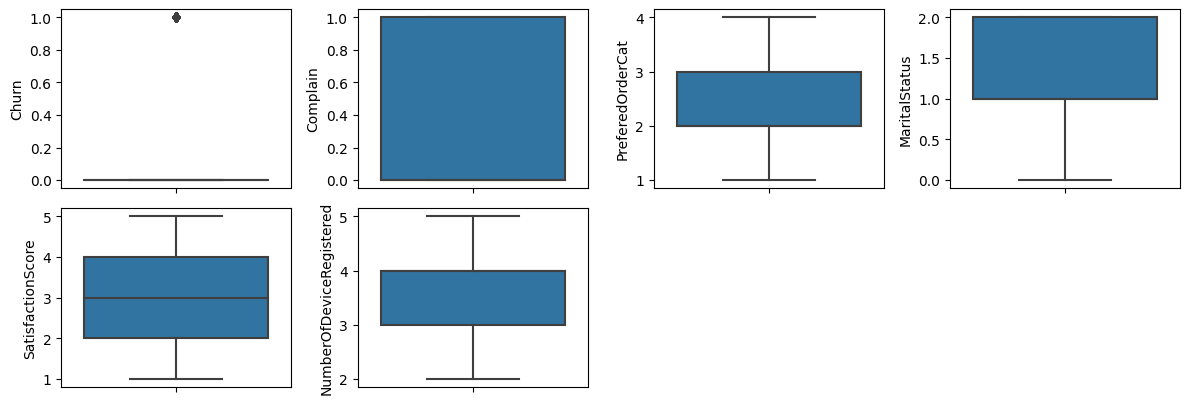

In [ ]:
# Visualisasi data setelah proses penghapusan data outlier menggunakan BoxPlot
fig = plt.figure(figsize=(12,18))
for i in range(len(df.columns)):
    fig.add_subplot(9,4,i+1)
    sns.boxplot(y=df.iloc[:,i])

plt.tight_layout()
plt.show()

## Menampilkan korelasi antara kolom "Churn" dengan kolom lainnya

Pada tahap ini, kita akan melihat seberapa kuat hubungan antara kolom "Churn" (kelas target) dengan kolom-kolom lainnya dalam dataset. Korelasi ini dapat memberikan wawasan tentang kolom mana yang mungkin memiliki pengaruh signifikan terhadap prediksi customer churn.

In [ ]:
# Korelasi antara kolom "Churn" dengan kolom lainnya

corr_matrix = df.corr()
corr_matrix

,Churn,Complain,PreferedOrderCat,MaritalStatus,SatisfactionScore,NumberOfDeviceRegistered
Churn,1.000000,0.274961,0.167177,0.156856,0.117313,0.079798
Complain,0.274961,1.000000,0.003805,-0.003698,-0.031006,0.001356
PreferedOrderCat,0.167177,0.003805,1.000000,0.048836,0.014099,0.020725
MaritalStatus,0.156856,-0.003698,0.048836,1.000000,-0.035863,0.044848
SatisfactionScore,0.117313,-0.031006,0.014099,-0.035863,1.000000,-0.008028
NumberOfDeviceRegistered,0.079798,0.001356,0.020725,0.044848,-0.008028,1.000000


<Axes: >

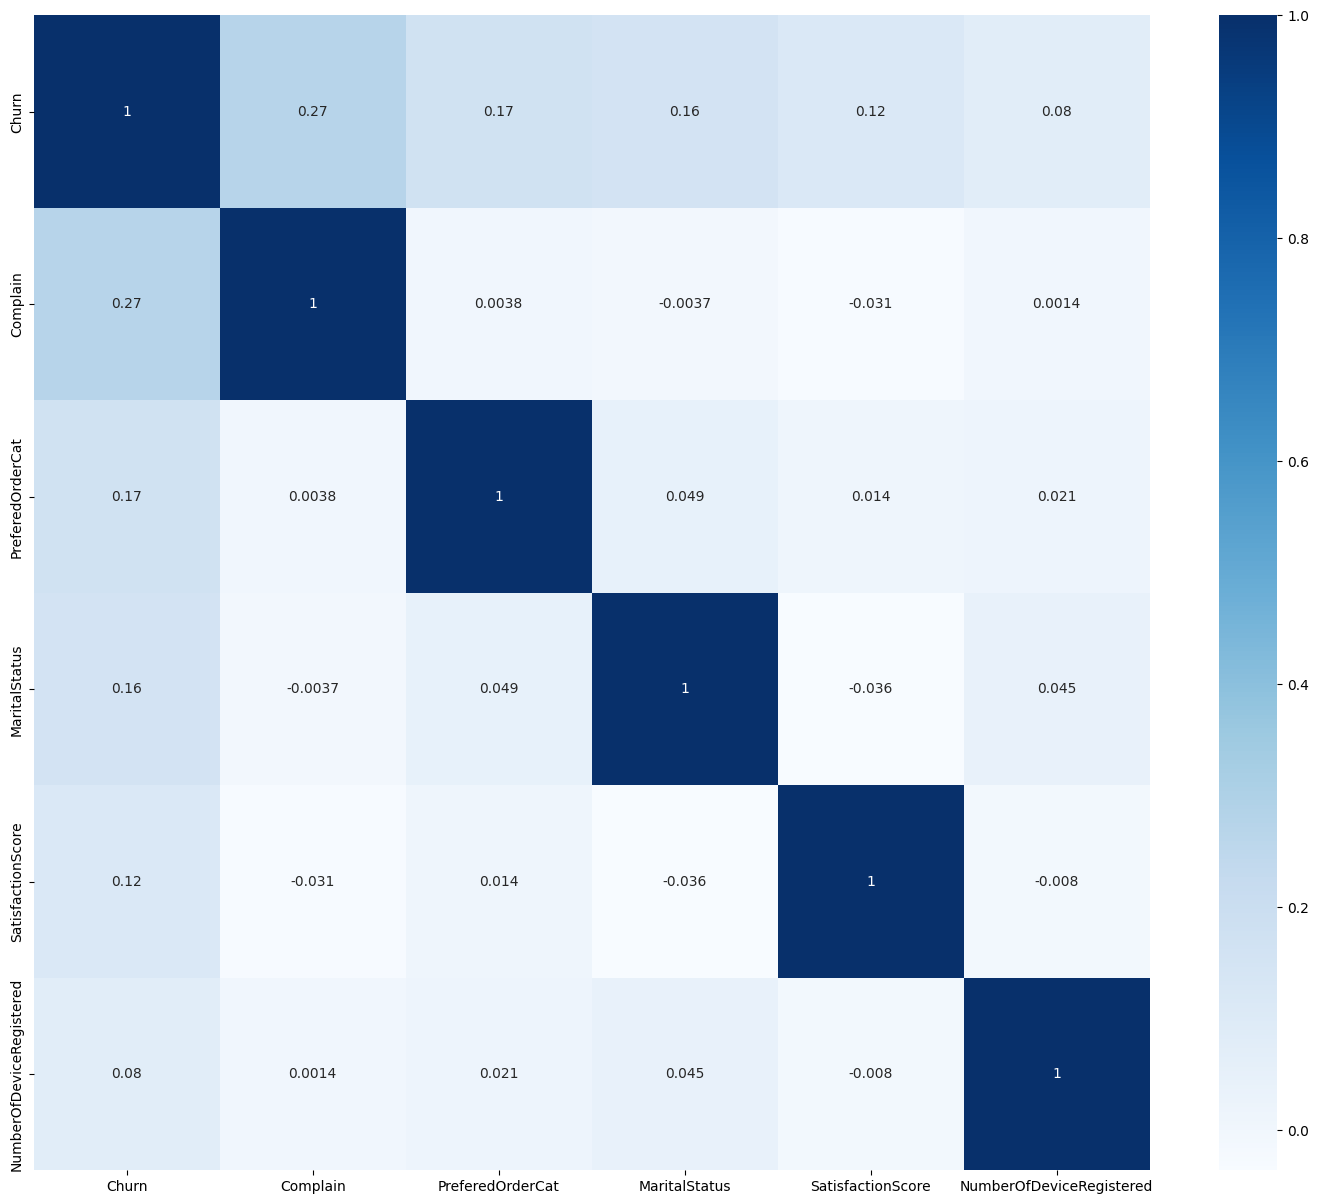

In [ ]:
#Visualisasi data hasil korelasi menggunakan seaborn heatmap
plt.figure(figsize = (18,15))
sns.heatmap(df.corr() , annot = True , cmap = 'Blues')

In [ ]:
# Menampilkan urutan korelasi tertinggi
churn_corr_vector = corr_matrix['Churn'].sort_values(ascending = False)
churn_corr_vector

Churn                       1.000000
Complain                    0.274961
PreferedOrderCat            0.167177
MaritalStatus               0.156856
SatisfactionScore           0.117313
NumberOfDeviceRegistered    0.079798
Name: Churn, dtype: float64

## Distribusi Kelas Target

Pada bagian ini, kami akan melihat sebaran jumlah sampel data di setiap kategori kelas pada kolom "Churn". Hal ini penting untuk mengidentifikasi apakah terjadi ketidakseimbangan kelas, di mana satu kelas memiliki jumlah sampel yang jauh lebih banyak atau lebih sedikit daripada kelas lainnya

In [ ]:
# Visualisasi histogram untuk melihat persebaran data
fig = px.histogram(df, x="Churn", color="Churn" ,text_auto= True , title="<b>"+'Check Imbalance' , color_discrete_sequence = ['#BA1F33','#3A506B'])

# Pengaturan pembuatan histogram
fig.update_layout(hovermode='x',title_font_size=30)
fig.update_layout(
title_font_color="black",
template="plotly",
title_font_size=30,
hoverlabel_font_size=20,
title_x=0.5,
xaxis_title='Churn',
yaxis_title='count',
)
fig.show()

##Menyeimbangkan Data
Terlihat pada histogram di atas bahwa terjadi ketimpangan antara nilai "Churn (1)" dan "Not Churn (0)". Maka dari itu, kami menggunakan metode SMOTETomek untuk menyeimbangkan data.

Metode SMOTETomek adalah gabungan dari 2 metode penyeimbangan data yaitu metode SMOTE yang merupakan metode over-sampling data minoritas supaya memiliki jumlah yang sama dengan data mayoritas, dan metode under-sampling dengan Tomek Links untuk membersihkan data yang terdistribusi pada area yang sama.

In [ ]:
# Memisahkan kolom target (Y) dengan kolom fitur (X)
X = df.drop('Churn' , axis = 1)
Y = df['Churn']

# Mengaplikasikan metode SMOTETomek kepada data
smt = SMOTETomek(random_state=42)
x_over , y_over = smt.fit_resample(X , Y)

# Melihat vektor data setelah proses SMOTETomek
x_over.shape, y_over.shape

((7400, 5), (7400,))

#4. Data Splitting

Pada tahap ini, dataset yang telah diproses akan dibagi menjadi dua bagian utama: data pelatihan (training data) dan data pengujian (testing data). Proses pembagian dataset ini bertujuan untuk melatih model pada data pelatihan dan menguji performanya pada data pengujian.

Data pelatihan digunakan untuk melatih model klasifikasi agar dapat belajar pola-pola yang ada dalam data tersebut. Sedangkan data pengujian digunakan untuk menguji sejauh mana model yang telah dilatih mampu melakukan prediksi dengan akurat pada data yang belum pernah dilihat sebelumnya.

Pemisahan dataset menjadi data pelatihan dan pengujian ini sangat penting untuk menghindari overfitting, yaitu kondisi di mana model terlalu "hafal" data pelatihan sehingga performanya menurun saat diuji pada data baru. Dengan pembagian dataset ini, kita dapat mengukur seberapa baik model dapat menggeneralisasi pola-pola dalam data.

Secara umum, pembagian dataset biasanya menggunakan perbandingan tertentu, seperti 70% data pelatihan dan 30% data pengujian. Namun, perbandingan tersebut dapat disesuaikan tergantung pada kasus dan kebutuhan spesifik dari proyek klasifikasi.

In [ ]:
#Split Data

# Memisahkan data menjadi data pelatihan (70%) dan data pengujian (30%)
x_train , x_test , y_train , y_test = train_test_split(x_over , y_over , test_size = 0.30 , random_state = 42)

# Keterangan
# x_train: data pelatihan fitur
# x_test: data pengujian fitur
# y_train: data pelatihan target
# y_test: data pengujian target

# Cetak vektor data pelatihan dan pengujian
print('Train Set Size : ', x_train.shape, y_train.shape)
print('Test Set Size  : ', x_test.shape, y_test.shape)

Train Set Size :  (5180, 5) (5180,)
Test Set Size  :  (2220, 5) (2220,)


#5. Data Transformation

Pada tahap ini, kita melakukan transformasi data dengan menggunakan teknik normalisasi MinMax. Normalisasi adalah proses untuk mengubah data agar memiliki nilai antara 0 dan 1. Hal ini dilakukan agar semua fitur dalam dataset memiliki skala yang serupa.

In [ ]:
#Normalisasi Data
MN = MinMaxScaler()
x_train_scaled = MN.fit_transform(x_train)
x_test_scaled = MN.fit_transform(x_test)

#6. Modeling & Evaluation

Pada tahap ini, kami membangun model machine learning untuk melakukan klasifikasi terhadap data pelanggan. Kami menggunakan algoritma yang berbeda untuk melatih model dan memilih yang terbaik berdasarkan evaluasi kinerja.

Algoritma-algoritma yang akan digunakan antara lain:
- Random Forest
- Support Vector Machine (SVM)
- Decision Tree

Setiap algoritma yanng diuji dengan berbagai parameter yang berbeda dalam proses hyperparameter tuning untuk mencari kombinasi parameter yang memberikan hasil terbaik. Evaluasi kinerja model dilakukan menggunakan metrik-metrik seperti akurasi, presisi, recall, dan F1-score.


Dalam tahap ini, kami juga akan melihat parameter terbaik untuk setiap algoritma yang diuji. Model terbaik akan digunakan untuk melakukan prediksi terhadap data pengujian dan mengukur kinerjanya dengan metrik-metrik evaluasi yang telah disebutkan.

#Skema 10

1. Random Forest
    max_depth = {None, 100, 200, 300, 400, 500, 1000}
    min_samples_leaf = {1, 2, 3, 4, 5, 6, 7, 8, 9, 10}
    min_samples_split = {2, 3, 4, 5, 6, 7, 8, 9, 10}

2. SVM
    kernel = {'linear', 'rbf', 'poly', 'sigmoid'}
    C = {0.001, 0.01, 0.1, 1, 10, 100, 1000}
    gamma = {1, 0.1, 0.01, 0.001}

3. Decision Tree
    max_depth = {None, 100, 200, 300, 400, 500, 1000}
    min_samples_leaf = {1, 2, 3, 4, 5, 6, 7, 8, 9, 10}
    min_samples_split = {2, 3, 4, 5, 6, 7, 8, 9, 10}


##Random Forest

In [ ]:
# Inisialisasi model Random Forest
rf = RandomForestClassifier()

# Hyperparameter yang akan diuji untuk algoritma Random Forest
grid_space={'max_depth':[None, 100, 200, 300, 400, 500, 1000],
              'min_samples_leaf':[1,2,3,4,5,6,7,8,9,10],
              'min_samples_split':[2,3,4,5,6,7,8,9,10]
           }


In [ ]:
# Membuat Grid Search untuk Random Forest
#grid = GridSearchCV(rf,param_grid=grid_space,cv=3,scoring='accuracy')

# Melakukan pelatihan dengan Grid Search
#model_grid = grid.fit(x_train_scaled,y_train)

In [ ]:
# Menampilkan parameter terbaik
#print('Best hyperparameters are: '+str(model_grid.best_params_))
#print('Best score is: '+str(model_grid.best_score_))

In [ ]:
# Menggunakan best hyperparameter untuk melatih model Random Forest pada seluruh data pelatihan
rf = RandomForestClassifier(max_depth = 1000, min_samples_leaf = 1, min_samples_split = 6)
rf.fit(x_train_scaled, y_train)

RandomForestClassifier(max_depth=1000, min_samples_split=6)

In [ ]:
# Melakukan prediksi pada data pelatihan dan pengujian
y_pred_train = rf.predict(x_train_scaled)
y_pred_test = rf.predict(x_test_scaled)

# Menampilkan hasil training dan test
print(f'Training Score: {rf.score(x_train_scaled, y_train)}')
print(f'Test Score: {rf.score(x_test_scaled, y_test)}')
print(f'Acc Train: {accuracy_score(y_train, y_pred_train)}')
print(f'Acc Test: {accuracy_score(y_test, y_pred_test)}')

Training Score: 0.7839768339768339
Test Score: 0.7671171171171172
Acc Train: 0.7839768339768339
Acc Test: 0.7671171171171172


Accuracy = 0.7671171171171172
Precision = 0.7554019014693172
Recall = 0.7888086642599278
F1-Score = 0.7717439293598234
ROC Area under Curve = 0.767156130691115
              precision    recall  f1-score   support

           0    0.77987   0.74550   0.76230      1112
           1    0.75540   0.78881   0.77174      1108

    accuracy                        0.76712      2220
   macro avg    0.76764   0.76716   0.76702      2220
weighted avg    0.76766   0.76712   0.76701      2220



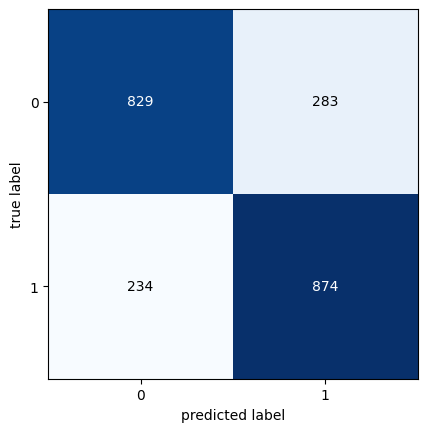

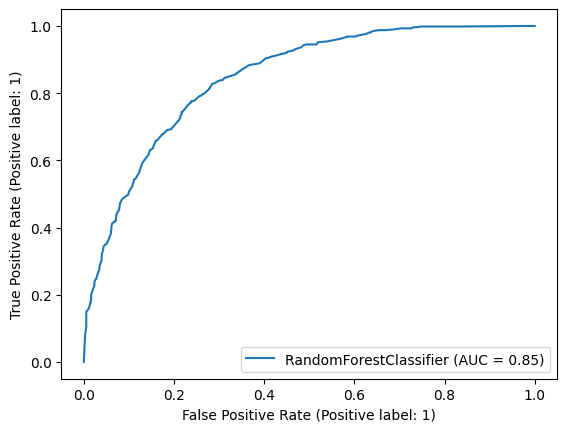

In [ ]:
# Menampilkan hasil metrik evaluasi untuk Random Forest
accuracy = accuracy_score(y_test, y_pred_test)
precision = precision_score(y_test, y_pred_test)
recall = recall_score(y_test, y_pred_test)
f1_rf = f1_score(y_test, y_pred_test)
roc_auc = roc_auc_score(y_test, y_pred_test)
print("Accuracy = {}".format(accuracy))
print("Precision = {}".format(precision))
print("Recall = {}".format(recall))
print("F1-Score = {}".format(f1_rf))
print("ROC Area under Curve = {}".format(roc_auc))
print(classification_report(y_test,y_pred_test,digits=5))
plot_confusion_matrix(confusion_matrix(y_test , y_pred_test))
RocCurveDisplay.from_estimator(rf , x_test_scaled , y_test)

##Support Vector Machine (SVM)

In [ ]:
# Inisialisasi model SVM
svmbest = SVC()

# Hyperparameter yang akan diuji untuk SVM
param_grid={'kernel':['linear', 'rbf', 'poly', 'sigmoid'],
              'C':[0.001, 0.01, 0.1, 1, 10, 100, 1000],
              'gamma':[1, 0.1, 0.01, 0.001]
           }


In [ ]:
# Membuat Grid Search untuk SVM
#grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2)

# Melakukan pelatihan dengan Grid Search pada data pelatihan
#grid.fit(x_train_scaled,y_train)

In [ ]:
# Menampilkan parameter terbaik
#print(grid.best_estimator_)

SVC(C=1000, gamma=1)


In [ ]:
# grid_predictions = grid.predict(x_test)
# print(confusion_matrix(y_test,grid_predictions))
# print(classification_report(y_test,grid_predictions))

In [ ]:
# Menggunakan parameter terbaik untuk melatih model SVM pada seluruh data pelatihan
svmbest = SVC(C = 1000, gamma = 1)
svmbest.fit(x_train_scaled, y_train)

SVC(C=1000, gamma=1)

In [ ]:
# Melakukan prediksi pada data pelatihan dan pengujian
y_pred_train = svmbest.predict(x_train_scaled)
y_pred_test = svmbest.predict(x_test_scaled)

# Menampilkan hasil training dan testing
print(f'Training Score: {svmbest.score(x_train_scaled, y_train)}')
print(f'Test Score: {svmbest.score(x_test_scaled, y_test)}')
print(f'Acc Train: {accuracy_score(y_train, y_pred_train)}')
print(f'Acc Test: {accuracy_score(y_test, y_pred_test)}')

Accuracy = 0.7684684684684685
Precision = 0.7508445945945946
Recall = 0.8023465703971119
F1-Score = 0.775741710296684
ROC Area under Curve = 0.7685294003064695
              precision    recall  f1-score   support

           0    0.78861   0.73471   0.76071      1112
           1    0.75084   0.80235   0.77574      1108

    accuracy                        0.76847      2220
   macro avg    0.76973   0.76853   0.76822      2220
weighted avg    0.76976   0.76847   0.76821      2220



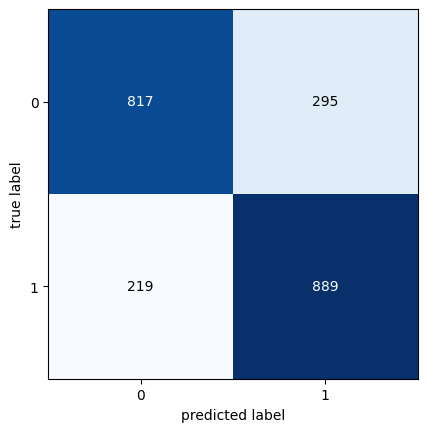

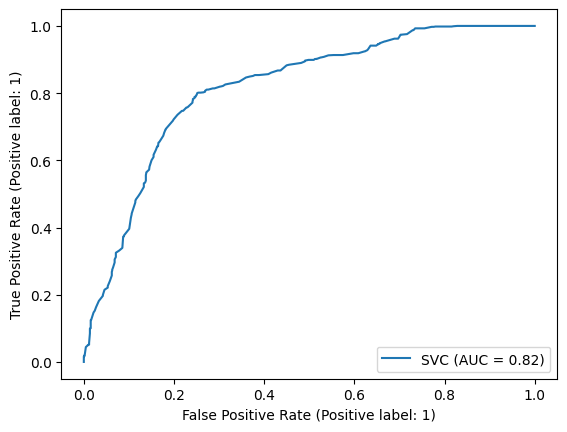

In [ ]:
# Menghitung metrik evaluasi untuk SVM
accuracy = accuracy_score(y_test, y_pred_test)
precision = precision_score(y_test, y_pred_test)
recall = recall_score(y_test, y_pred_test)
f1_svm = f1_score(y_test, y_pred_test)
roc_auc = roc_auc_score(y_test, y_pred_test)
print("Accuracy = {}".format(accuracy))
print("Precision = {}".format(precision))
print("Recall = {}".format(recall))
print("F1-Score = {}".format(f1_svm))
print("ROC Area under Curve = {}".format(roc_auc))
print(classification_report(y_test,y_pred_test,digits=5))
plot_confusion_matrix(confusion_matrix(y_test , y_pred_test))
RocCurveDisplay.from_estimator(svmbest , x_test_scaled , y_test)

##Decision Tree

In [ ]:
# Inisialisasi Model Decision Tree
dtbest = DecisionTreeClassifier()

# Hyperparameter yang akan diuji untuk Decision Tree
param_grid={'max_depth':[None, 100, 200, 300, 400, 500, 1000],
              'min_samples_leaf':[1,2,3,4,5,6,7,8,9,10],
              'min_samples_split':[2,3,4,5,6,7,8,9,10]
           }

In [ ]:
# Membuat Grid Search untuk Decision Tree
#grid = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=10, verbose=1, n_jobs=-1)

# Melakukan pelatihan dengan Grid Search pada data pelatihan
#grid.fit(x_train_scaled,y_train)

Fitting 10 folds for each of 630 candidates, totalling 6300 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [None, 100, 200, 300, 400, 500, 1000],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10]},
             verbose=1)

In [ ]:
# Menampilkan parameter terbaik
#grid.best_params_

{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5}

In [ ]:
# Menggunakan hyperparameter terbaik untuk melatih model Decision Tree pada seluruh data pelatihan
dtbest = DecisionTreeClassifier(max_depth = None, min_samples_leaf = 1, min_samples_split = 5)
dtbest.fit(x_train_scaled, y_train)

DecisionTreeClassifier(min_samples_split=5)

In [ ]:
# Melakukan prediksi pada data latih dan uji
y_pred_train = dtbest.predict(x_train_scaled)
y_pred_test = dtbest.predict(x_test_scaled)

# Mencetak nilai data latih dan uji
print(f'Training Score: {dtbest.score(x_train_scaled, y_train)}')
print(f'Test Score: {dtbest.score(x_test_scaled, y_test)}')
print(f'Acc Train: {accuracy_score(y_train, y_pred_train)}')
print(f'Acc Test: {accuracy_score(y_test, y_pred_test)}')

Training Score: 0.7843629343629344
Test Score: 0.7684684684684685
Acc Train: 0.7843629343629344
Acc Test: 0.7684684684684685


Accuracy = 0.7684684684684685
Precision = 0.7582608695652174
Recall = 0.7870036101083032
F1-Score = 0.7723649247121346
ROC Area under Curve = 0.7685018050541516
              precision    recall  f1-score   support

           0    0.77944   0.75000   0.76444      1112
           1    0.75826   0.78700   0.77236      1108

    accuracy                        0.76847      2220
   macro avg    0.76885   0.76850   0.76840      2220
weighted avg    0.76887   0.76847   0.76839      2220



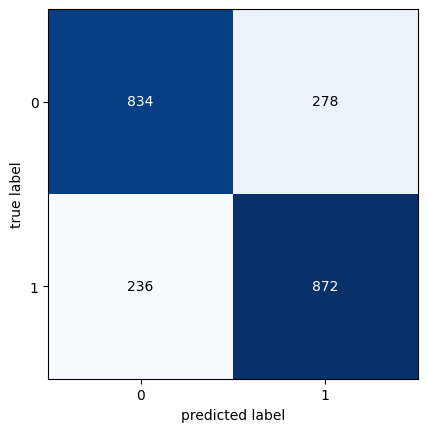

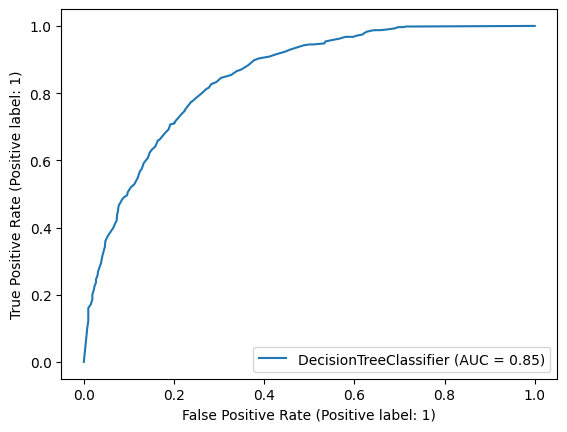

In [ ]:
# Menampilkan hasil metrik evaluasi untuk Decision Tree
accuracy = accuracy_score(y_test, y_pred_test)
precision = precision_score(y_test, y_pred_test)
recall = recall_score(y_test, y_pred_test)
f1_dt = f1_score(y_test, y_pred_test)
roc_auc = roc_auc_score(y_test, y_pred_test)
print("Accuracy = {}".format(accuracy))
print("Precision = {}".format(precision))
print("Recall = {}".format(recall))
print("F1-Score = {}".format(f1_dt))
print("ROC Area under Curve = {}".format(roc_auc))
print(classification_report(y_test,y_pred_test,digits=5))
plot_confusion_matrix(confusion_matrix(y_test , y_pred_test))
RocCurveDisplay.from_estimator(dtbest , x_test_scaled , y_test)

#Save Model Klasifikasi

Pada tahap ini, setelah kami memilih model terbaik dan melatihnya, serta melakukan preprocessing data, kami akan menyimpan model dan preprocessing scaler ke dalam file terpisah. Hal ini penting untuk memungkinkan penggunaan model yang telah dilatih dan scaler yang telah disesuaikan pada tahap deployment.

In [ ]:
# Inisialisasi model SVM terbaik dengan parameter yang tepat
best_model_classification = SVC(C=1000, gamma=1)

# Melatih model terbaik pada data pelatihan yang telah discaling
best_model_classification.fit(x_train_scaled, y_train)

# Gunakan model untuk prediksi
prediction = best_model_classification.predict(x_test_scaled)

NameError: ignored

#Save Model
Model yang telah dilatih dan scaler akan disimpan dalam format file pickle (.pkl) sehingga dapat digunakan kembali dengan mudah saat kita membangun antarmuka pengguna dengan Streamlit. Selain itu, ini juga memungkinkan untuk menghindari pelatihan ulang model dan preprocessing ketika kita ingin melakukan prediksi pada data baru di lingkungan produksi.

Dengan menyimpan model dan preprocessing scaler, kita dapat memuatnya kembali dalam aplikasi Streamlit dan menggunakan model tersebut untuk melakukan prediksi terhadap data pelanggan yang baru dimasukkan oleh pengguna. Ini akan mempermudah proses deployment dan menjadikan aplikasi lebih efisien.

In [ ]:
import pickle

# Simpan scaler ke dalam file 'scaler_ds.pkl'
with open('scaler_pred.pkl', 'wb') as scaler_file:
    pickle.dump(MN, scaler_file)

# Simpan model terbaik ke dalam file 'model_ds.pkl'
with open('model_pred.pkl', 'wb') as model_file:
    pickle.dump(best_model_classification, model_file)

#Testing
Tahap terakhir dari proses ini adalah pengujian. Dalam tahap ini, kami akan menguji model klasifikasi yang telah dilatih menggunakan data uji yang belum pernah dilihat sebelumnya. Pengujian ini bertujuan untuk mengevaluasi sejauh mana model dapat melakukan prediksi dengan baik pada data yang belum pernah dilihat sebelumnya. Hasil pengujian ini akan memberikan kita pemahaman tentang seberapa baik model ini dapat digunakan dalam situasi dunia nyata.

In [ ]:
import numpy as np
import pickle

# Input fitur-fitur
Complain = 1
PreferedOrderCat = 2
MaritalStatus = 2
SatisfactionScore = 2
NumberOfDeviceRegistered = 3


# Data dalam bentuk list
data = [
    [
        Complain,
        PreferedOrderCat,
        MaritalStatus,
        SatisfactionScore,
        NumberOfDeviceRegistered
    ]
]

# Load model dan skaler yang telah disimpan sebelumnya
MN = pickle.load(open('scaler_pred.pkl', 'rb'))
best_model_classification = pickle.load(open('model_pred.pkl', 'rb'))

# Standardisasi data
data_scaled = MN.transform(data)

# Prediksi hasil Status
hasil_prediksi = best_model_classification.predict(data_scaled)
hasil_prediksi = int(hasil_prediksi)

# Mapping hasil prediksi ke label yang sesuai
if hasil_prediksi == 0:
    status = "Not Churn"
elif hasil_prediksi == 1:
    status = "Churn"

# Menampilkan hasil prediksi
print(f"Hasil Prediksi Status: {status}")


Hasil Prediksi Status: Churn


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but MinMaxScaler was fitted with feature names

